<a href="https://colab.research.google.com/github/viictoria-dvvv/SDS230_Final/blob/main/CPSC_452_Homework_2_Victoria_D_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 2

In [1]:
import random
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

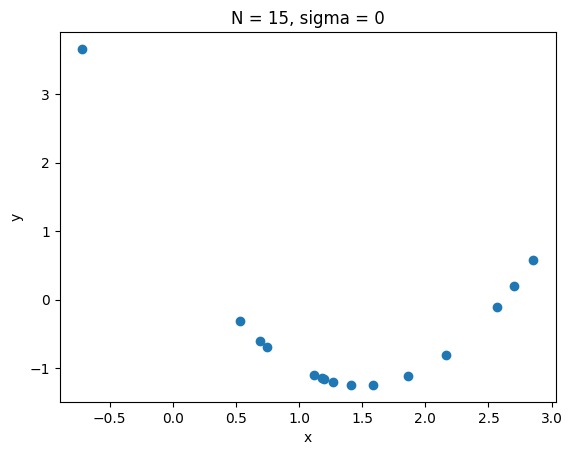

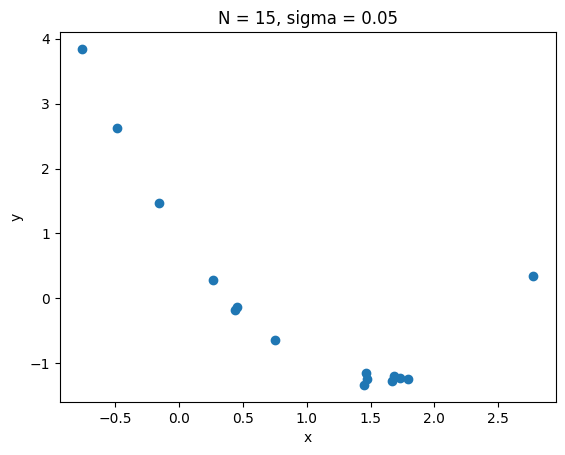

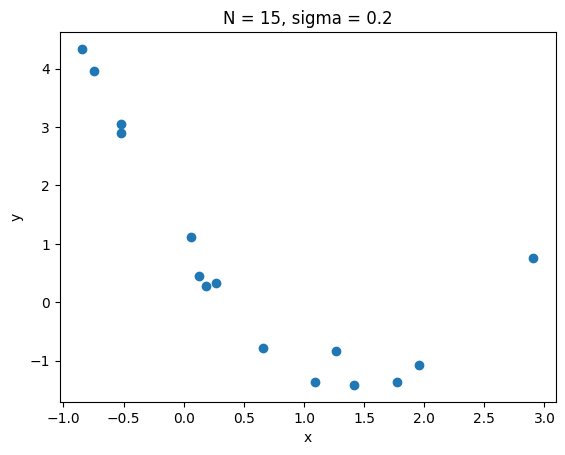

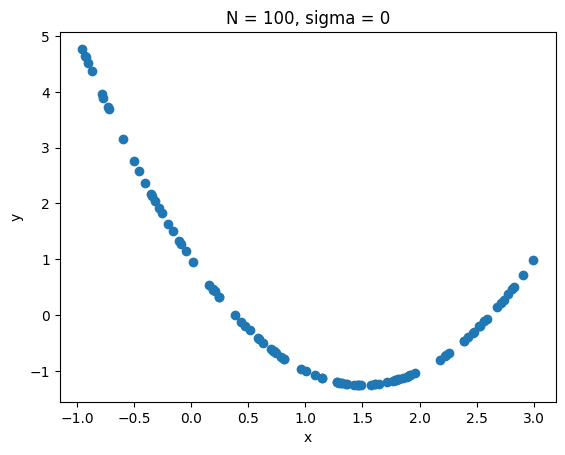

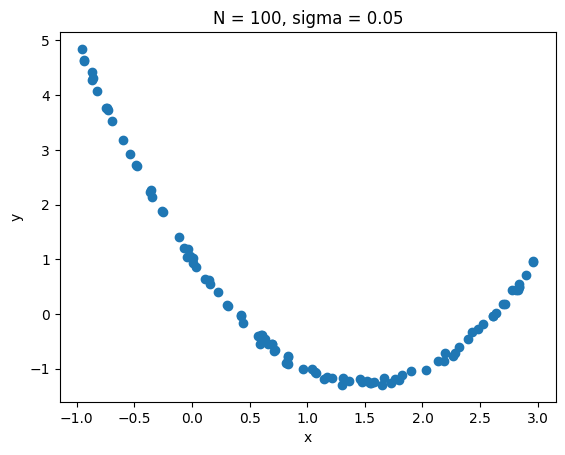

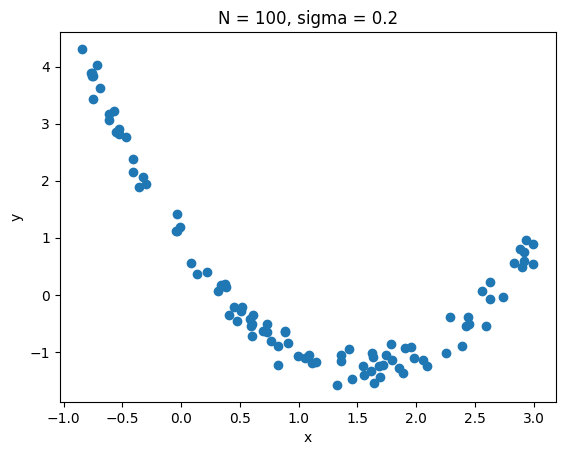

In [2]:
# PART ONE
np.random.seed(0)

#define the main function
def main_function(x):
    return x**2 - 3*x + 1

# define values required in problem
N_vals = [15, 100]
sigma_vals = [0, 0.05, 0.2]

# store datasets for pt 2
stored_datasets = {}

plot_number = 1

for N in N_vals:
    for sigma in sigma_vals:
        x = np.random.uniform(-1, 3, N)
        y_true = main_function(x)

        #generate noise
        noise = np.random.normal(0, sigma, N)
        y_noise = y_true + noise

        stored_datasets[(N, sigma)] = (x, y_noise)

        plt.figure()
        plt.scatter(x, y_noise)
        plt.title("N = " + str(N) + ", sigma = " + str(sigma))
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()


Dataset: N = 100 , sigma = 0.2

Degree: 1
Weights: [ 0.2633278  -0.48371467]
MSE: 1.2995722737100512

Degree: 2
Weights: [ 1. -3.  1.]
MSE: 1.4509147310436793e-29

Degree: 9
Weights: [ 9.99969959e-01 -2.99996251e+00  9.99963194e-01  1.98911875e-05
  4.47034836e-06 -1.58548355e-05  1.07884407e-05 -3.66568565e-06
  6.63101673e-07 -5.00585884e-08]
MSE: 5.4165282014288e-10


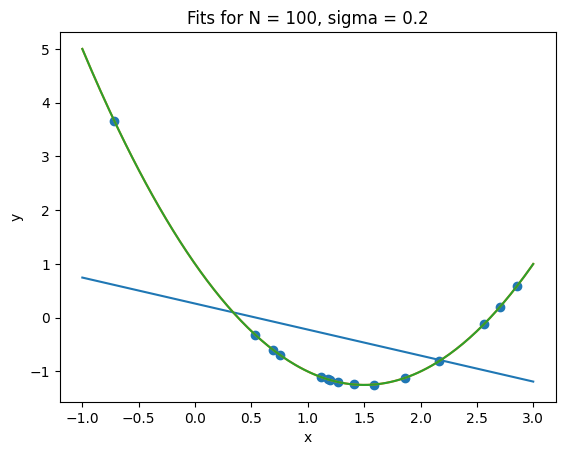


Dataset: N = 100 , sigma = 0.2

Degree: 1
Weights: [ 1.12511895 -1.23379275]
MSE: 0.95519132319836

Degree: 2
Weights: [ 0.9847643  -2.98259529  0.99055941]
MSE: 0.0021256522590676246

Degree: 9
Weights: [ 1.00802796 -2.91449053  0.19801184  0.33191106  3.17998015 -3.05813405
 -2.05136394  3.8814535  -1.76863757  0.26142374]
MSE: 0.0015209230565461905


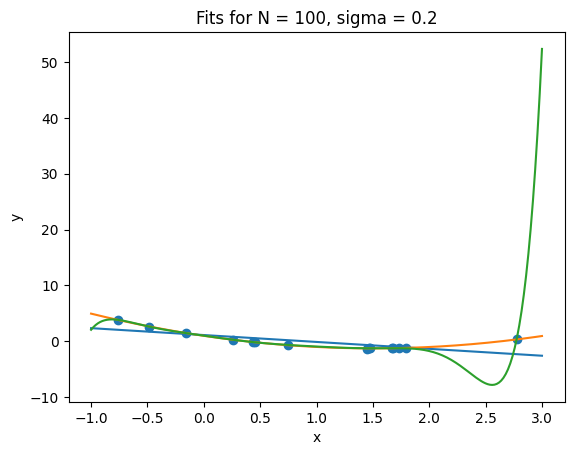


Dataset: N = 100 , sigma = 0.2

Degree: 1
Weights: [ 1.51078882 -1.35256308]
MSE: 1.6229920539638518

Degree: 2
Weights: [ 1.01078887 -3.15170937  1.05552174]
MSE: 0.032102041202340434

Degree: 9
Weights: [ 1.10741377 -3.45183495 -0.18182787  0.31759466  2.58879241 -0.65198643
 -1.74850975  0.98013886 -0.08138928 -0.01991956]
MSE: 0.024294450327646145


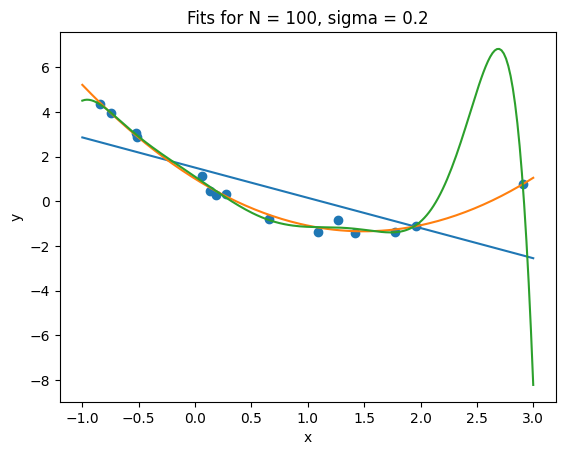


Dataset: N = 100 , sigma = 0.2

Degree: 1
Weights: [ 1.30743447 -1.04690418]
MSE: 1.400368138147627

Degree: 2
Weights: [ 1. -3.  1.]
MSE: 2.9047023947310507e-30

Degree: 9
Weights: [ 9.99999999e-01 -3.00000000e+00  1.00000000e+00 -1.65800884e-09
 -1.57524482e-09  8.34916136e-10  1.37333700e-09 -1.27693056e-09
  3.89718480e-10 -4.16662260e-11]
MSE: 2.865557096278439e-18


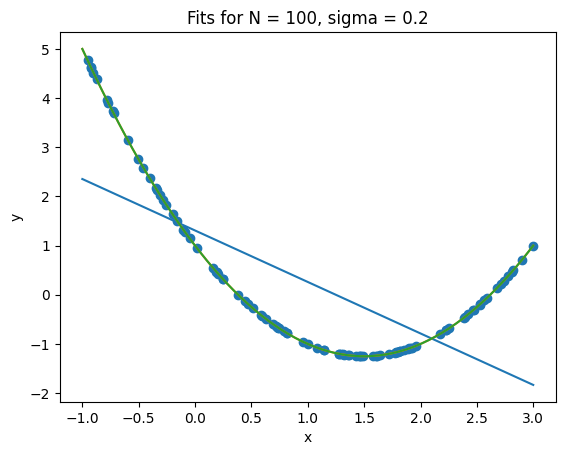


Dataset: N = 100 , sigma = 0.2

Degree: 1
Weights: [ 1.34617857 -0.95519782]
MSE: 1.6310874099353503

Degree: 2
Weights: [ 0.99980425 -3.00666921  1.00136737]
MSE: 0.002461530281835606

Degree: 9
Weights: [ 1.01445428e+00 -3.06337523e+00  9.76455723e-01  1.87427509e-01
 -1.00675693e-01 -1.00368607e-01  1.14812104e-01 -3.69323910e-02
  2.88006420e-03  3.12380413e-04]
MSE: 0.0022414150221367


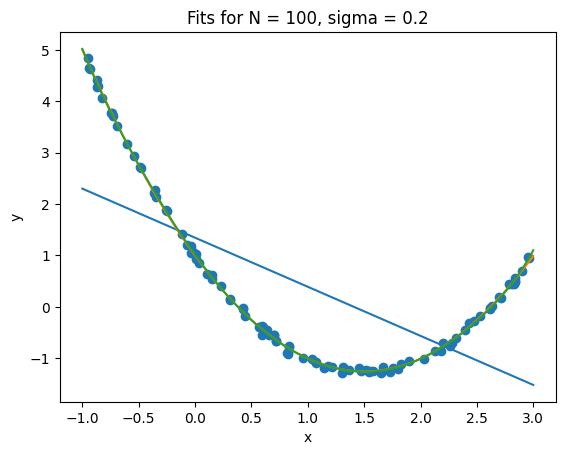


Dataset: N = 100 , sigma = 0.2

Degree: 1
Weights: [ 1.21262536 -0.94057079]
MSE: 1.509325613260431

Degree: 2
Weights: [ 0.98468343 -3.00723415  0.99119932]
MSE: 0.03391107936689601

Degree: 9
Weights: [ 0.98128812 -2.95070215  0.89359852 -0.17228771  0.23535957  0.0597161
 -0.07927815 -0.03678697  0.03378702 -0.00567817]
MSE: 0.03257071467016948


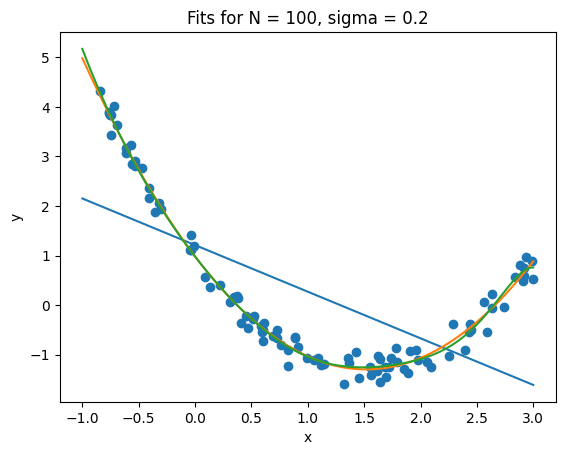

In [6]:
# PART TWO

# functon for polynomial design matrix
def create_design_matrix(x, degree):
    N = len(x)
    #empty matrix
    X = np.zeros((N, degree + 1))
    # filling in each matrix by column
    for i in range (degree + 1):
        X[:, i] = x**i
    return X

# function to fund MSE
def calculate_MSE(y_true, y_pred):
    N = len(y_true)
    error = y_true - y_pred
    mse = np.sum(error**2) / N
    return mse

degrees = [1, 2, 9]

for key, value in stored_datasets.items():
    x = value[0]
    y = value[1]

    print("\n=============================")
    print("Dataset: N =", N, ", sigma =", sigma)
    print("=============================")

    plt.figure()
    plt.scatter(x, y)

    # Create smooth x values for plotting curves
    x_plot = np.linspace(-1, 3, 200)

    for degree in degrees:

        # design matrix
        X = create_design_matrix(x, degree)

        # analytical least squares solution
        XT = X.T
        XT_X = np.dot(XT, X)
        XT_X_inv = np.linalg.inv(XT_X)
        XT_y = np.dot(XT, y)

        w = np.dot(XT_X_inv, XT_y)

        # predict on training data
        y_pred = np.dot(X, w)

        mse = calculate_MSE(y, y_pred)

        # print weights and MSE
        print("\nDegree:", degree)
        print("Weights:", w)
        print("MSE:", mse)

        # plot curve
        X_plot = create_design_matrix(x_plot, degree)
        y_plot = np.dot(X_plot, w)

        plt.plot(x_plot, y_plot)

    plt.title("Fits for N = " + str(N) + ", sigma = " + str(sigma))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

Dataset: N=100, sigma=0.2

Degree 1 (Linear): MSE = 1.30 — Underfitting bc high bias

Degree 2 (Quadratic): MSE = 0.0025 — Good Fit, Low Bias, Low Variance

Degree 9 (High-Order): MSE = 0.0022 — Overfitting bc high variance
___________________
Dataset: N=15, sigma=0.2

Degree 1 (Linear): MSE = 1.63 - Underfitting

Degree 2 (Quadratic): MSE = 0.034 — Good Fit

Degree 9 (High-Order): MSE = 0.032 — Overfitting bc oscillations at edges

1. Linear Model: This underfits the data.The true function is quadratic $y = x^2 - 3x + 1$, so its a curved parabola. A straight line doesn't have the complexity to capture the curvature --> high bias & much higher MSE compared to the other models (e.g., MSE $\approx$ 0.95 vs 0.002

2. Quadratic Model: The degree 2 model is a good fit. Since the data was generated from a quadratic equation, this model is perfect for capturing without fitting the random noise. It gets a very low MSE that is close to the irreducible error.

3. High-Order Polynomial: Overfitting the data because while it gets the lowest training MSE the model is too complex and begins to "chase" the random noise in the data instead of the true signal. It's clear in the plots where the curve oscillates between data points to pass through every point --> high variance

Problem 3

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# PART ONE
file_path = "/content/drive/MyDrive/prob3_data_seed.dat"
data = np.loadtxt(file_path)

# Separate features and labels
X = data[:, :-1]   # all columns except last
y = data[:, -1]    # last column

print("Dataset shape:", data.shape)
print("Number of classes:", np.unique(y))


# ------------------------------
# Min-Max Scaling
# ------------------------------

X_scaled = np.zeros_like(X)

for j in range(X.shape[1]):   # loop over each feature column

    column = X[:, j]

    min_val = np.min(column)
    max_val = np.max(column)

    X_scaled[:, j] = (column - min_val) / (max_val - min_val)

print("Features normalized using min-max scaling.")

Dataset shape: (210, 8)
Number of classes: [1. 2. 3.]
Features normalized using min-max scaling.



k = 1
LOOCV error: 0.05714285714285714
5-Fold error: 0.14761904761904762

k = 5
LOOCV error: 0.07142857142857142
5-Fold error: 0.12857142857142856

k = 10
LOOCV error: 0.08095238095238096
5-Fold error: 0.1523809523809524

k = 15
LOOCV error: 0.08095238095238096
5-Fold error: 0.1380952380952381


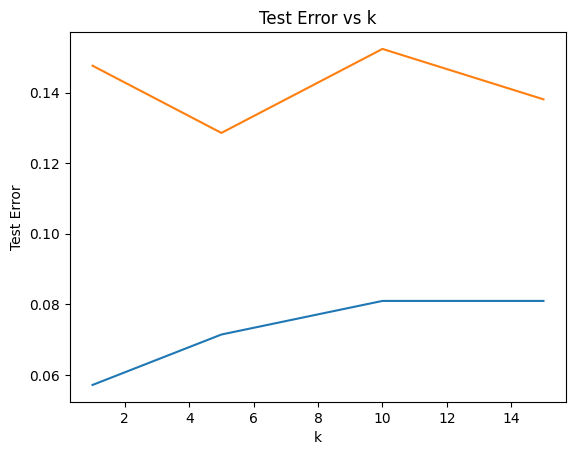

In [9]:
# PART TWO
# k-NN Prediction Function

def knn_predict(X_train, y_train, x_test, k):

    distances = []

    # euclidean distance to every training point
    for i in range(len(X_train)):

        diff = X_train[i] - x_test
        dist = np.sqrt(np.sum(diff**2))

        distances.append((dist, y_train[i]))

    # sort by distance
    distances.sort(key=lambda x: x[0])

    # first k labels
    k_labels = []
    for i in range(k):
        k_labels.append(distances[i][1])

    # majority vote
    prediction = max(set(k_labels), key=k_labels.count)

    return prediction

# LOOCV

def loocv_error(X, y, k):

    errors = 0
    N = len(X)

    for i in range(N):

        X_train = np.delete(X, i, axis=0)
        y_train = np.delete(y, i)

        X_test = X[i]
        y_test = y[i]

        prediction = knn_predict(X_train, y_train, X_test, k)

        if prediction != y_test:
            errors += 1

    return errors / N

# 5-Fold cross val

def five_fold_cv(X, y, k):

    N = len(X)
    fold_size = N // 5
    errors = 0

    for fold in range(5):

        start = fold * fold_size
        end = start + fold_size

        X_test = X[start:end]
        y_test = y[start:end]

        X_train = np.concatenate((X[:start], X[end:]), axis=0)
        y_train = np.concatenate((y[:start], y[end:]), axis=0)

        for i in range(len(X_test)):

            prediction = knn_predict(X_train, y_train, X_test[i], k)

            if prediction != y_test[i]:
                errors += 1

    return errors / N

# for k values

k_values = [1, 5, 10, 15]

loocv_errors = []
fivefold_errors = []

for k in k_values:

    e_loocv = loocv_error(X_scaled, y, k)
    e_five = five_fold_cv(X_scaled, y, k)

    loocv_errors.append(e_loocv)
    fivefold_errors.append(e_five)

    print("\nk =", k)
    print("LOOCV error:", e_loocv)
    print("5-Fold error:", e_five)


# error vs  plot

plt.figure()
plt.plot(k_values, loocv_errors)
plt.plot(k_values, fivefold_errors)

plt.xlabel("k")
plt.ylabel("Test Error")
plt.title("Test Error vs k")
plt.show()

k = 1 got the lowest LOOCV error 5.7%, but a higher 5-fold error 14.8%, suggesting possible overfitting, since k=1 is sensitive to noise and closely fits training points.

k = 5 produced the lowest 5-fold error 12.9% --> better generalization performance.

For larger values of k like 10 and 15, the error increases slightly, so maybe the model may begin to underfit as the decision boundary becomes too smooth.

Overall, k = 5 seems to give the best bias-variance tradeoff with the lowest 5-fold cross-validation error.

I.e small k → lower bias, higher variance & risk of overfitting

Large k → higher bias, lower variance & risk of underfitting

In [10]:
# PART THREE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 5-Fold for sklearn models

def five_fold_cv_model(model, X, y):

    N = len(X)
    fold_size = N // 5
    total_errors = 0
    total_train_errors = 0

    for fold in range(5):

        start = fold * fold_size
        end = start + fold_size

        X_test = X[start:end]
        y_test = y[start:end]

        X_train = np.concatenate((X[:start], X[end:]), axis=0)
        y_train = np.concatenate((y[:start], y[end:]), axis=0)

        model.fit(X_train, y_train)

        # train error
        train_predictions = model.predict(X_train)
        total_train_errors += np.sum(train_predictions != y_train)

        # test error
        test_predictions = model.predict(X_test)
        total_errors += np.sum(test_predictions != y_test)

    train_error = total_train_errors / N
    test_error = total_errors / N

    return train_error, test_error

# LR

log_model = LogisticRegression(max_iter=1000)
log_train_error, log_test_error = five_fold_cv_model(log_model, X_scaled, y)

print("\nLogistic Regression")
print("Training Error:", log_train_error)
print("Test Error:", log_test_error)


# Decision Tree

depth_values = [1, 3, 5, None]

for depth in depth_values:

    tree_model = DecisionTreeClassifier(max_depth=depth)

    train_error, test_error = five_fold_cv_model(tree_model, X_scaled, y)

    print("\nDecision Tree (max_depth =", depth, ")")
    print("Training Error:", train_error)
    print("Test Error:", test_error)


Logistic Regression
Training Error: 0.24761904761904763
Test Error: 0.18095238095238095

Decision Tree (max_depth = 1 )
Training Error: 0.8952380952380953
Test Error: 0.8714285714285714

Decision Tree (max_depth = 3 )
Training Error: 0.14285714285714285
Test Error: 0.23809523809523808

Decision Tree (max_depth = 5 )
Training Error: 0.004761904761904762
Test Error: 0.22380952380952382

Decision Tree (max_depth = None )
Training Error: 0.0
Test Error: 0.24761904761904763


Logistic Regression

Training Error: 0.2476

Test Error: 0.1810
performs moderately well but has higher error compared to the best k-NN model. Bc LR makes linear decision boundaries, this suggests the true class boundaries may be nonlinear, which are limiting its performance. The small gap between training and test error tells us it is not severely overfitting.

Decision Tree Classifier
Depth = 1

Training Error: 0.8952

Test Error: 0.8714
This model really underfits. A depth-1 tree is essentially a single split and cannot capture structure in the data.

Depth = 3

Training Error: 0.1429

Test Error: 0.2381

Improved training performance, but test error remains kind of high.

Depth = 5

Training Error: 0.0048

Test Error: 0.2238

The training error becomes extremely small, but test error remains high --> good indication of indicates overfitting.

Depth = None (Fully Grown Tree)

Training Error: 0.0000

Test Error: 0.2476

The model perfectly fits the training data but performs poorly on test data, clearly overfitting.

Overall Comparison

The best performing model overall was k-NN with k = 5, achieving the lowest 5-fold test error (12.86%).

LR did worse, probably bc of its linear decision boundary.

Decision trees either severely underfit (small depth) or overfit (large depth).

So, the k-NN classifier gave the best balance between bias and variance for this dataset.